In [ ]:
"""
A simple script that demonstrates how we classify textual data with sklearn.

"""

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.gaussian_process import GaussianProcessClassifier as GPC
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [ ]:

#read the reviews and their polarities from a given file
def loadData(fname):
    reviews=[]
    labels=[]
    f=open(fname)
    for line in f:
        review,rating=line.strip().split('\t')
        reviews.append(review.lower())
        labels.append(int(rating))
    f.close()
    return reviews,labels


In [ ]:

rev_train,labels_train=loadData('reviews_train.txt')
rev_test,labels_test=loadData('reviews_test.txt')


#Build a counter based on the training dataset
counter = CountVectorizer()
counter.fit(rev_train)


#count the number of times each term appears in a document and transform each doc into a count vector
counts_train = counter.transform(rev_train)#transform the training data
counts_test = counter.transform(rev_test)#transform the testing data


In [ ]:
range_start = 2
range_finish = 100
def training_func(classifier):
  accuracy = []
  for i in range(range_start, range_finish):
    clf = classifier(max_depth=i, criterion=criteria)


    clf.fit(counts_train,labels_train)


    pred=clf.predict(counts_test)


    acc =  accuracy_score(pred,labels_test)
    accuracy.append(acc)
  return accuracy





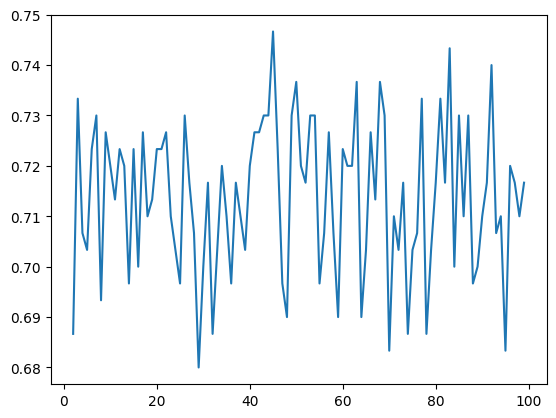

In [ ]:
accuracy = training_func(DecisionTreeClassifier, 'entropy')

plt.plot(range(range_start, range_finish), accuracy)

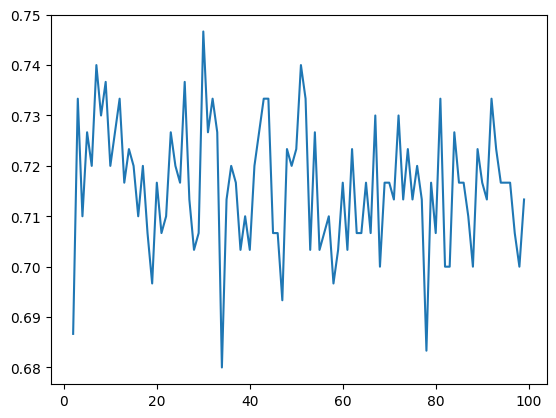

In [ ]:
accuracy = training_func(DecisionTreeClassifier, 'gini')

plt.plot(range(range_start, range_finish), accuracy)

In [ ]:

#train classifier
clf = svm.SVC(C = 2, kernel = 'poly', degree = 1)

#train all classifier on the same datasets
clf.fit(counts_train,labels_train)

#use hard voting to predict (majority voting)
pred=clf.predict(counts_test)

#print accuracy
print (accuracy_score(pred,labels_test))



0.8533333333333334


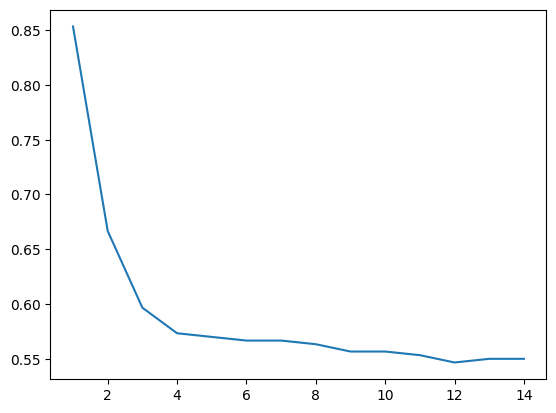

In [ ]:
range_start = 1
range_finish = 15
def training_func(classifier, kernel):
  accuracy = []
  for i in range(range_start, range_finish):
    clf = classifier(C = 2, kernel = kernel, degree = i)
    clf.fit(counts_train,labels_train)
    pred=clf.predict(counts_test)
    acc =  accuracy_score(pred,labels_test)
    accuracy.append(acc)
  return accuracy


accuracy = training_func(svm.SVC, 'poly')

plt.plot(range(range_start, range_finish), accuracy)

In [ ]:

#train classifier
clf = RandomForestClassifier(n_estimators=90, max_depth=None,
min_samples_split=2, random_state=0)

#train all classifier on the same datasets
clf.fit(counts_train,labels_train)

#use hard voting to predict (majority voting)
pred=clf.predict(counts_test)

#print accuracy
print (accuracy_score(pred,labels_test))



0.88


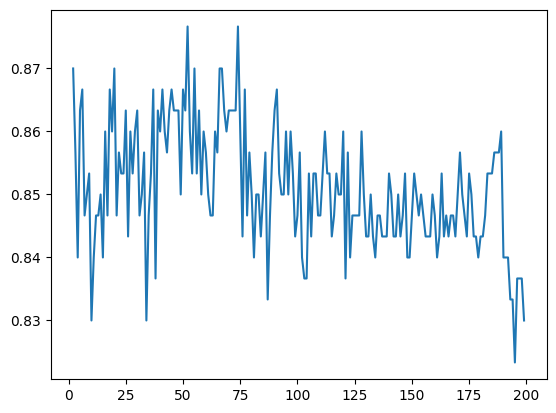

In [ ]:
range_start = 2
range_finish = 200
def training_func(classifier):
  accuracy = []
  for i in range(range_start, range_finish):
    clf = classifier(n_estimators=75, max_depth=None, min_samples_split=i, random_state=0)
    clf.fit(counts_train,labels_train)
    pred=clf.predict(counts_test)
    acc =  accuracy_score(pred,labels_test)
    accuracy.append(acc)
  return accuracy


accuracy = training_func(RandomForestClassifier)

plt.plot(range(range_start, range_finish), accuracy)

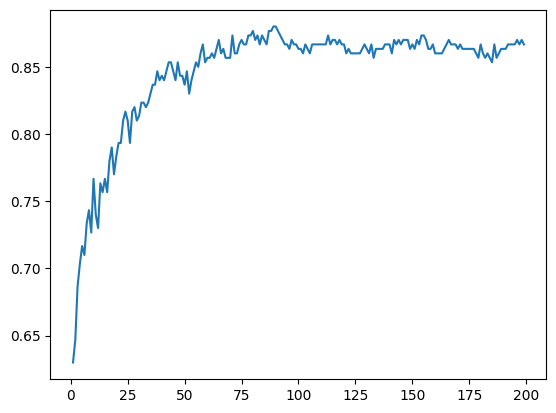

In [ ]:
plt.plot(range(range_start, range_finish), accuracy)

In [ ]:

#train classifier
clf = ExtraTreesClassifier(n_estimators=80)

#train all classifier on the same datasets
clf.fit(counts_train,labels_train)

#use hard voting to predict (majority voting)
pred=clf.predict(counts_test)

#print accuracy
print (accuracy_score(pred,labels_test))

0.8633333333333333


In [ ]:

#train classifier
clf = SGDClassifier(loss="hinge", penalty=None, max_iter=155)

#train all classifier on the same datasets
clf.fit(counts_train,labels_train)

#use hard voting to predict (majority voting)
pred=clf.predict(counts_test)

#print accuracy
print (accuracy_score(pred,labels_test))

0.8466666666666667


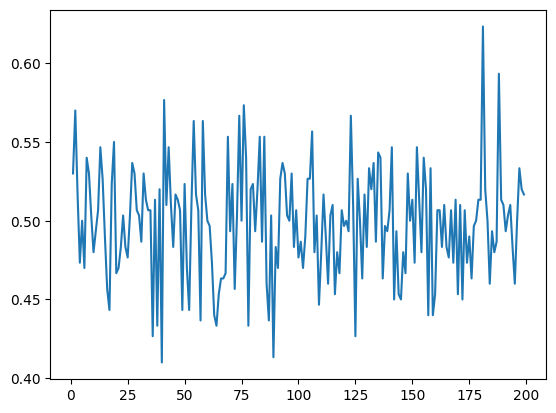

In [ ]:
range_start = 1
range_finish = 200
def training_func(classifier):
  accuracy = []
  for i in range(range_start, range_finish):
    clf = classifier(loss="squared_error", penalty=None, max_iter=i)
    clf.fit(counts_train,labels_train)
    pred=clf.predict(counts_test)
    acc =  accuracy_score(pred,labels_test)
    accuracy.append(acc)
  return accuracy


accuracy = training_func(SGDClassifier)

plt.plot(range(range_start, range_finish), accuracy)

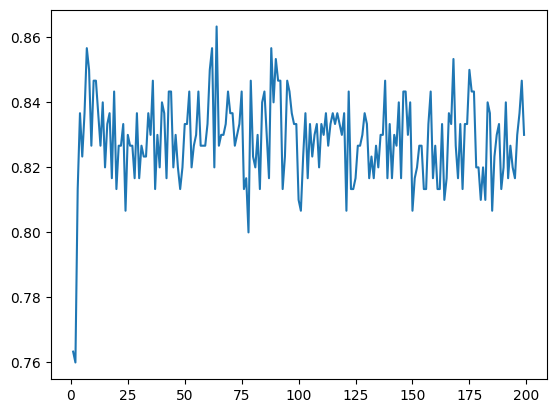

In [ ]:
range_start = 1
range_finish = 200
def training_func(classifier):
  accuracy = []
  for i in range(range_start, range_finish):
    clf = classifier(loss="log_loss", penalty=None, max_iter=i)
    clf.fit(counts_train,labels_train)
    pred=clf.predict(counts_test)
    acc =  accuracy_score(pred,labels_test)
    accuracy.append(acc)
  return accuracy


accuracy = training_func(SGDClassifier)

plt.plot(range(range_start, range_finish), accuracy)

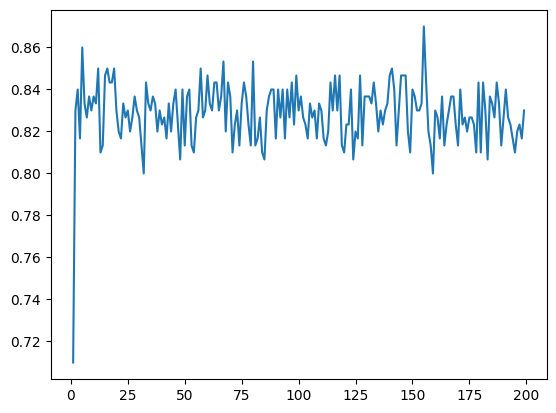

In [ ]:
range_start = 1
range_finish = 200
def training_func(classifier):
  accuracy = []
  for i in range(range_start, range_finish):
    clf = classifier(loss="hinge", penalty=None, max_iter=i)
    clf.fit(counts_train,labels_train)
    pred=clf.predict(counts_test)
    acc =  accuracy_score(pred,labels_test)
    accuracy.append(acc)
  return accuracy


accuracy = training_func(SGDClassifier)

plt.plot(range(range_start, range_finish), accuracy)

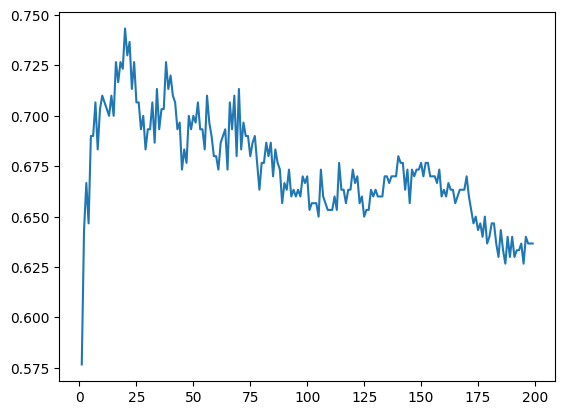

In [ ]:
range_start = 1
range_finish = 200
def training_func(classifier):
  accuracy = []
  for i in range(range_start, range_finish):
    clf = classifier(n_neighbors = i)
    clf.fit(counts_train,labels_train)
    pred=clf.predict(counts_test)
    acc =  accuracy_score(pred,labels_test)
    accuracy.append(acc)
  return accuracy


accuracy = training_func(knn)

plt.plot(range(range_start, range_finish), accuracy)

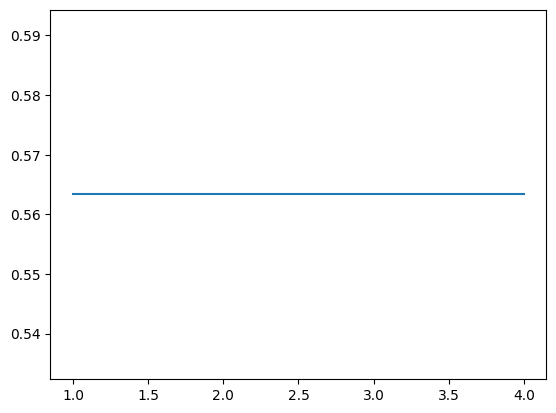

In [ ]:
range_start = 1
range_finish = 5
def training_func(classifier):
  accuracy = []
  for i in range(range_start, range_finish):
    clf = classifier(max_iter_predict = i)
    clf.fit(counts_train.toarray(),labels_train)
    pred=clf.predict(counts_test.toarray())
    acc =  accuracy_score(pred,labels_test)
    accuracy.append(acc)
  return accuracy


accuracy = training_func(GPC)

plt.plot(range(range_start, range_finish), accuracy)

In [ ]:

#train classifier
clf = GPC()
clf.fit(counts_train.toarray(),labels_train)

#use hard voting to predict (majority voting)
pred=clf.predict(counts_test.toarray())

#print accuracy
print (accuracy_score(pred,labels_test))

0.5633333333333334


In [ ]:

#train classifier
clf = GNB()

clf.fit(counts_train.toarray(),labels_train)

#use hard voting to predict (majority voting)
pred=clf.predict(counts_test.toarray())

#print accuracy
print (accuracy_score(pred,labels_test))

0.66


## Neural Networks = 92% Accuracy

In [ ]:

#train classifier
clf = MLPClassifier(max_iter = 7, activation = 'identity')

clf.fit(counts_train,labels_train)

#use hard voting to predict (majority voting)
pred=clf.predict(counts_test)
#print accuracy
print (accuracy_score(pred,labels_test))

0.92


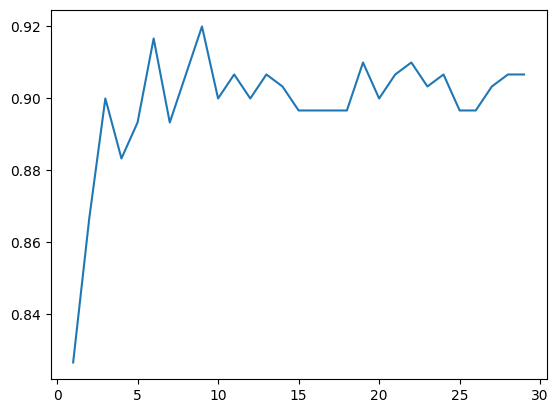

In [ ]:
range_start = 1
range_finish = 30
def training_func(classifier):
  accuracy = []
  for i in range(range_start, range_finish):
    clf = classifier(max_iter = i, solver='adam', activation = 'identity')
    clf.fit(counts_train.toarray(),labels_train)
    pred=clf.predict(counts_test)
    acc =  accuracy_score(pred,labels_test)
    accuracy.append(acc)
  return accuracy


accuracy = training_func(MLPClassifier)

plt.plot(range(range_start, range_finish), accuracy)

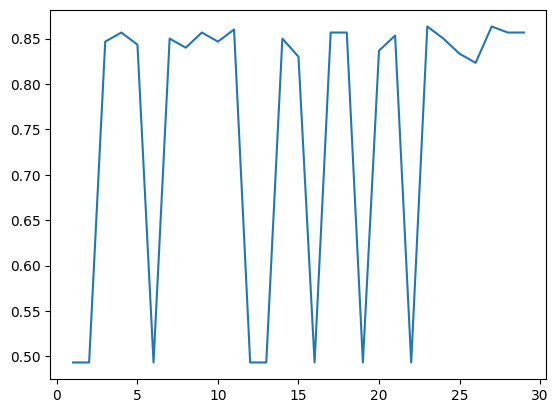

In [ ]:
range_start = 1
range_finish = 30
def training_func(classifier):
  accuracy = []
  for i in range(range_start, range_finish):
    clf = classifier(solver='lbfgs', alpha=0.10, hidden_layer_sizes=(i, 2), random_state=1)
    clf.fit(counts_train.toarray(),labels_train)
    pred=clf.predict(counts_test)
    acc =  accuracy_score(pred,labels_test)
    accuracy.append(acc)
  return accuracy


accuracy = training_func(MLPClassifier)

plt.plot(range(range_start, range_finish), accuracy)